In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
newcustomer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList')

In [3]:
transaction_df.head()


,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [4]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [5]:
transaction_df.drop(index=transaction_df.index[0],axis=0,inplace=True)

In [6]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [7]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [8]:
print(transaction_df.isnull().values.sum())
transaction_df = transaction_df.replace(" ", np.NaN)
numeric_columns = transaction_df.select_dtypes(include=np.number)
mean_values = numeric_columns.mean()
print(mean_values)
transaction_df= transaction_df.fillna(mean_values)
print(transaction_df.isnull().values.sum())


1542
Series([], dtype: float64)
1542


In [9]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


In [10]:
transaction_df['product_line'].value_counts().index[0]

'Standard'

In [11]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


In [12]:
for col in transaction_df.columns:
    if transaction_df[col].dtypes=='object':
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
        

In [13]:

print(transaction_df.isnull().values.sum())

0


In [14]:
dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)

datetime.datetime(2017, 2, 1, 0, 0)

In [15]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,2017-06-01
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,2017-11-01
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410,2017-04-01
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,2017-07-01


In [16]:
# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction_df.groupby('customer_id')['TransactionMonth']
# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
print(transaction_df.head())

0  transaction_id  product_id  customer_id transaction_date  online_order   
1               1           2         2950       2017-02-25         False  \
2               2           3         3120       2017-05-21          True   
3               3          37          402       2017-10-16         False   
4               4          88         3135       2017-08-31         False   
5               5          78          787       2017-10-01          True   

0 order_status           brand product_line product_class product_size   
1     Approved           Solex     Standard        medium       medium  \
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date TransactionMonth   
1       71.49     

In [17]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

In [18]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10-01,2017-01-01,10


In [19]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()


,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [20]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


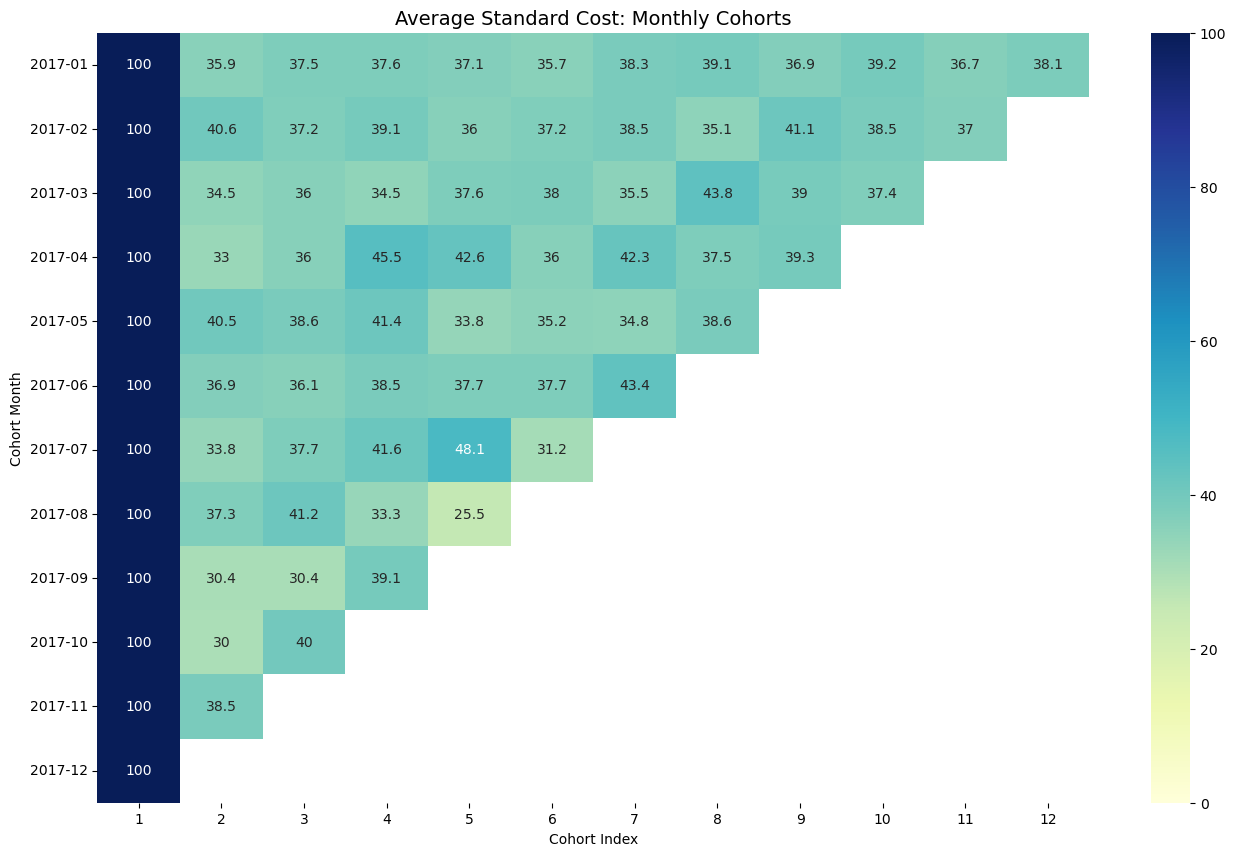

In [22]:
retention = retention.round(3)*100
retention.index = pd.to_datetime(retention.index)
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation='horizontal')
plt.show()


In [23]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10-01,2017-01-01,10


In [24]:
#distrubution and root cause analysis
customerinfo_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customerinfo_df.index = customerinfo_df.index + 1

In [25]:
customerinfo_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
2,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
3,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
4,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
5,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [26]:
print(customerinfo_df.isnull().values.sum())

1337


In [27]:
customerinfo_df=customerinfo_df.replace(' ', np.NaN)

In [28]:
print(customerinfo_df.isnull().values.sum())

1337


In [29]:
CustomerinfoAndTransaction_df = pd.merge(transaction_df,customerinfo_df, on='customer_id', how='outer')
CustomerinfoAndTransaction_df.index = CustomerinfoAndTransaction_df.index + 1

In [30]:
CustomerinfoAndTransaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1.0,2.0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11 00:00:00,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,11065.0,1.0,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19.0,1955-01-11 00:00:00,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,18923.0,62.0,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11 00:00:00,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
4,2.0,3.0,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04 00:00:00,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
5,6862.0,4.0,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Female,89.0,1979-02-04 00:00:00,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [31]:
grouped_df = transaction_df.groupby('customer_id')['list_price'].sum()
grouped_df

customer_id
1       9084.45
2       4149.07
3       9888.23
4       1047.72
5       5903.20
         ...   
3497    3744.07
3498    5177.06
3499    7673.48
3500    4922.41
5034    1519.92
Name: list_price, Length: 3494, dtype: float64

In [32]:
grouped_df.to_excel('grouped_data.xlsx', index='true')

In [33]:
groupedexcel_df = pd.read_excel('grouped_data.xlsx')
groupedexcel_df.index = groupedexcel_df.index + 1

In [34]:
groupedexcel_df.head()

,customer_id,list_price
1,1,9084.45
2,2,4149.07
3,3,9888.23
4,4,1047.72
5,5,5903.20


In [36]:
tot_trans_And_cusinfo = pd.merge(groupedexcel_df,customerinfo_df,on='customer_id',how='outer')

In [37]:
tot_trans_And_cusinfo.head()
tot_trans_And_cusinfo.index = tot_trans_And_cusinfo.index + 1

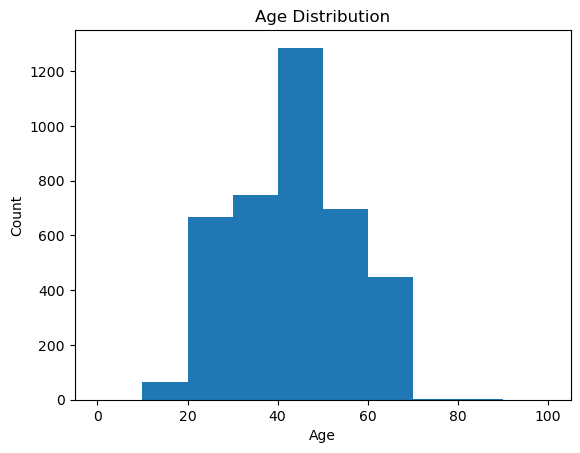

In [38]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram with age ranges on the x-axis
plt.hist(tot_trans_And_cusinfo['age'], bins=age_ranges)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Display the plot
plt.show()

<Axes: xlabel='gender', ylabel='list_price'>

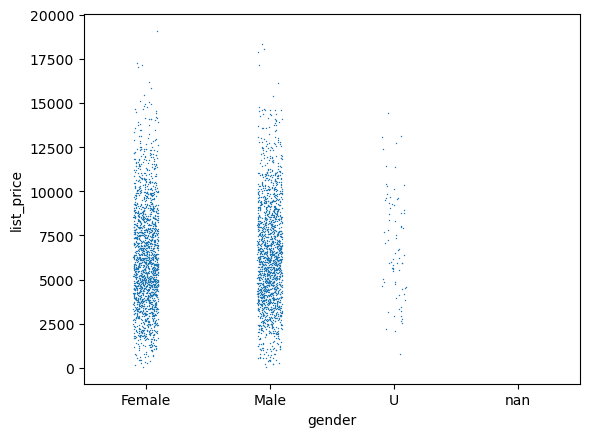

In [39]:
sns.stripplot(x='gender', y='list_price', hue=None, data=tot_trans_And_cusinfo, jitter=True,
                      color=None, size=1,
                      edgecolor="gray", linewidth=0)

<Axes: xlabel='job_industry_category', ylabel='list_price'>

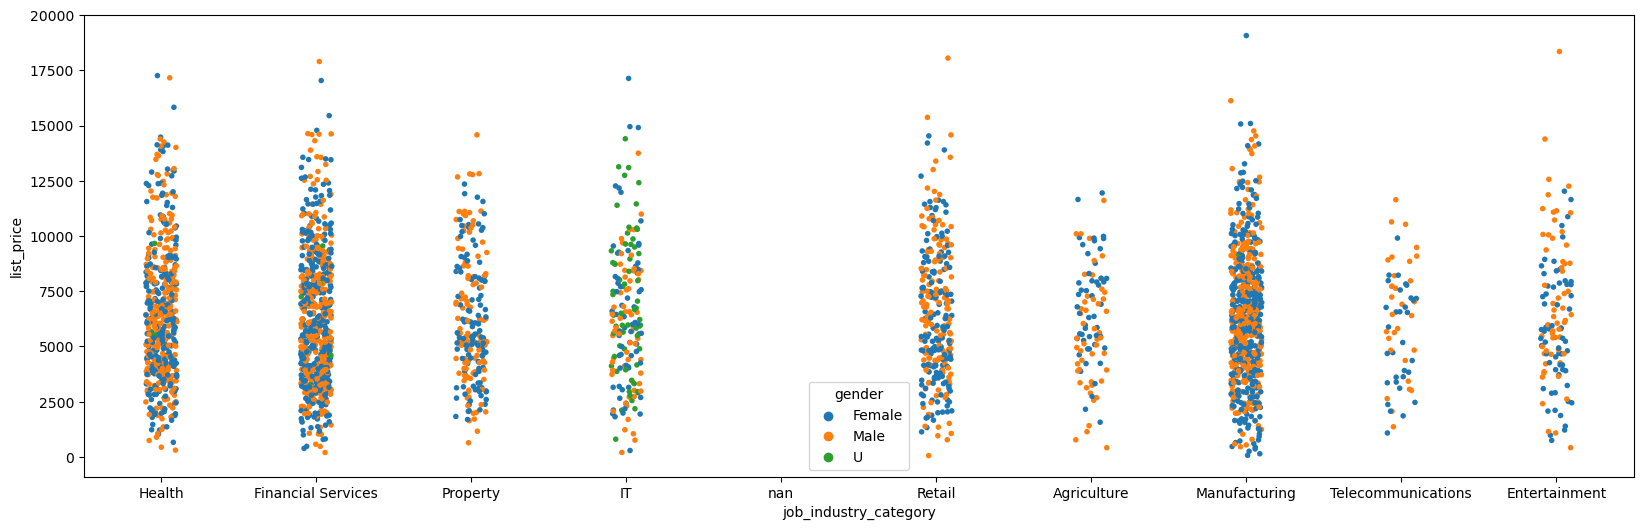

In [40]:
plt.figure(figsize=(20, 6))
sns.stripplot(x='job_industry_category', y='list_price', hue='gender', data=tot_trans_And_cusinfo, jitter=True,
                      color=None, size=4,
                      edgecolor="gray", linewidth=0)



In [41]:
tot_trans_And_cusinfo['job_industry_category'] = tot_trans_And_cusinfo['job_industry_category'].fillna(tot_trans_And_cusinfo['job_industry_category'].value_counts().index[0])

<Axes: xlabel='owns_car', ylabel='list_price'>

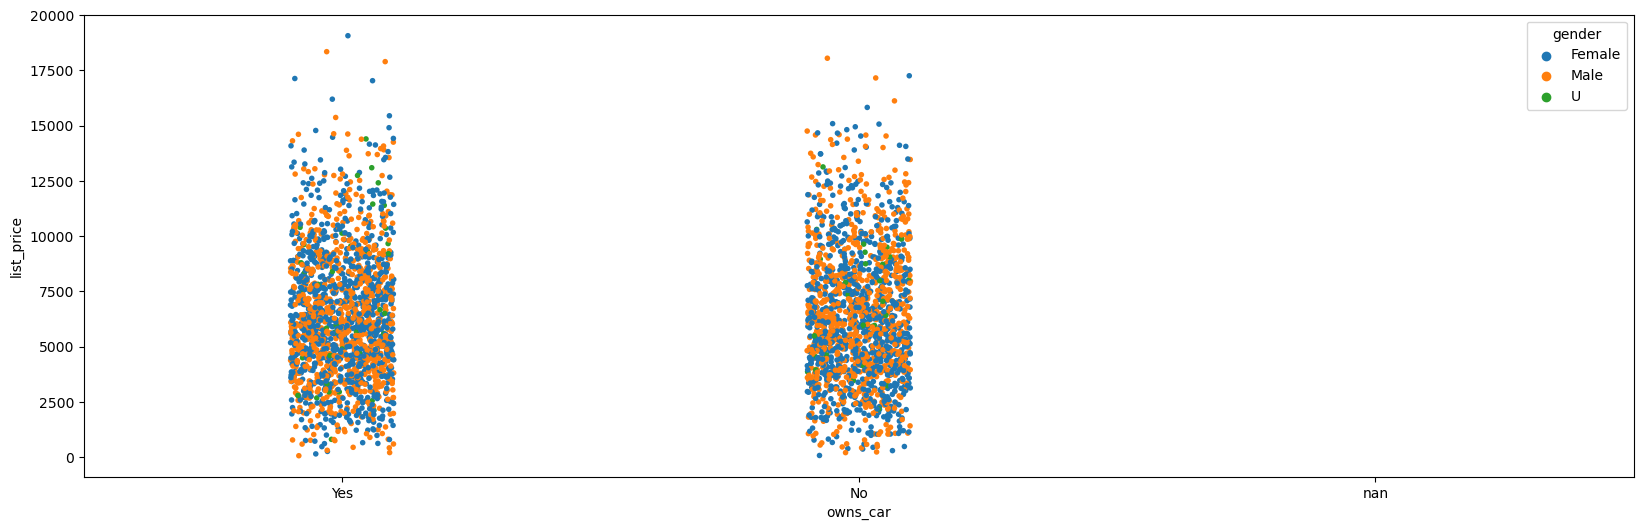

In [42]:
plt.figure(figsize=(20, 6))
sns.stripplot(x='owns_car', y='list_price', hue='gender', data=tot_trans_And_cusinfo, jitter=True,
                      color=None, size=4,
                      edgecolor="gray", linewidth=0)


<Axes: >

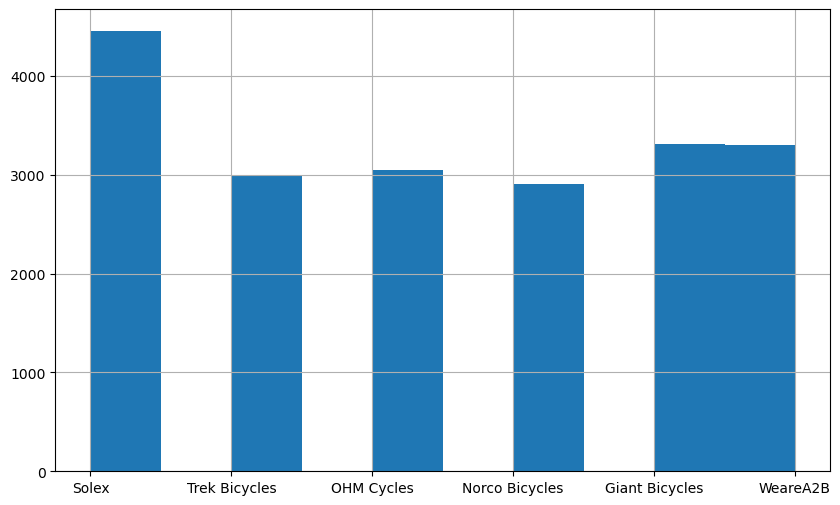

In [43]:
plt.figure(figsize = (10,6))
transaction_df['brand'].hist()

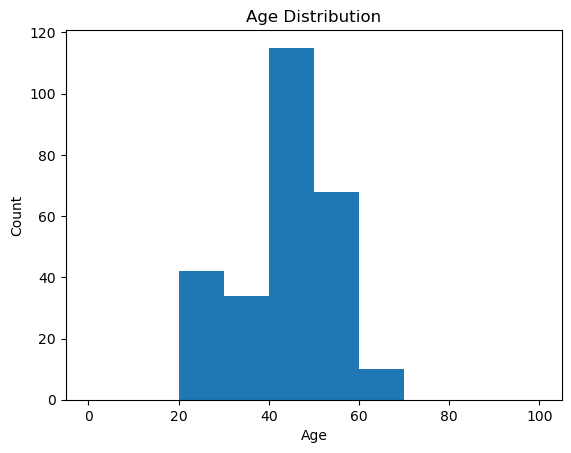

In [44]:
#According to the Retention Data,now we do some root cuase analysis
#We notice a chart box of cohort month on July with cohort index 5 has high retention rate, we may look the data of cohort month July
targetdate_2017_07 = pd.to_datetime('2017-07-01')
# Filter rows matching the target date
filtered_2017_07 = CustomerinfoAndTransaction_df[CustomerinfoAndTransaction_df['CohortMonth'] == targetdate_2017_07]
#Distrubution of Age
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(filtered_2017_07['age'], bins=age_ranges)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()



<Axes: >

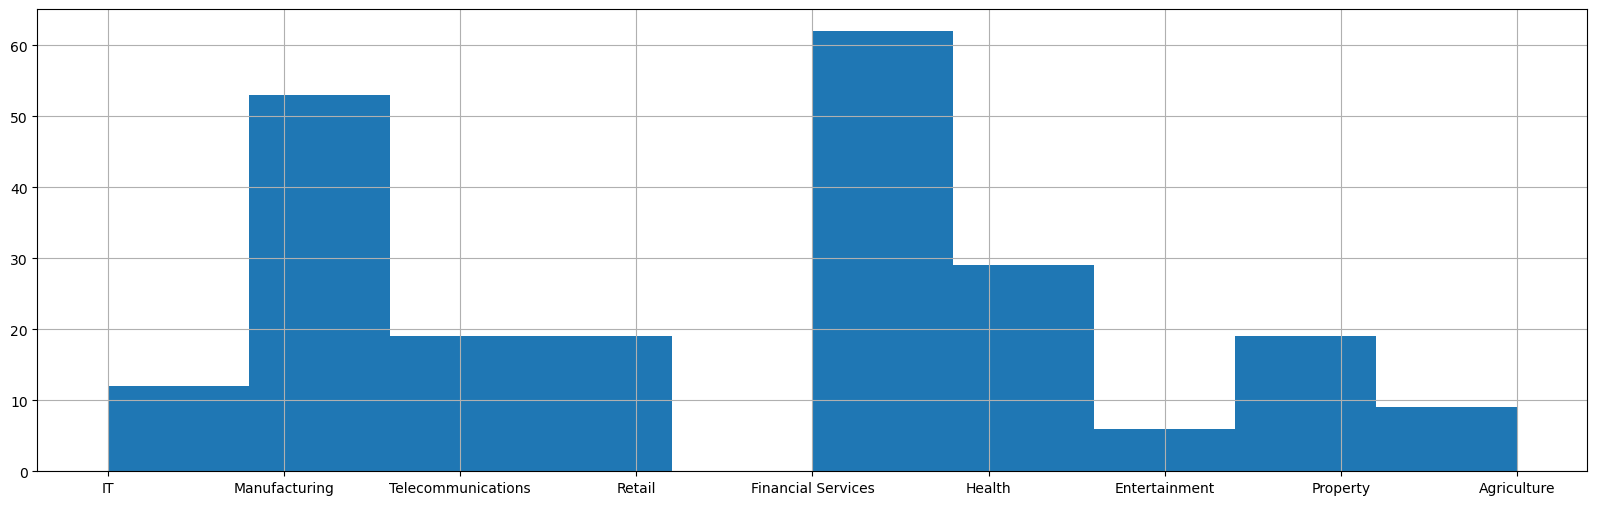

In [45]:
#Distrubution of job_industry_category
plt.figure(figsize=(20, 6))
filtered_2017_07['job_industry_category'].hist()

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
CustomerinfoAndTransaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1.0,2.0,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1.0,Kristos Anthony,Male,19.0,1955-01-11 00:00:00,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,11065.0,1.0,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,2017-10-01,2017-02-01,9.0,Kristos Anthony,Male,19.0,1955-01-11 00:00:00,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,18923.0,62.0,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,2017-04-01,2017-02-01,3.0,Kristos Anthony,Male,19.0,1955-01-11 00:00:00,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
4,2.0,3.0,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5.0,Lauree O'Donnell,Female,89.0,1979-02-04 00:00:00,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
5,6862.0,4.0,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,2017-10-01,2017-01-01,10.0,Lauree O'Donnell,Female,89.0,1979-02-04 00:00:00,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [49]:
filtered_2017_07['job_industry_category'].value_counts()

job_industry_category
Financial Services    62
Manufacturing         53
Health                29
Telecommunications    19
Retail                19
Property              19
IT                    12
Agriculture            9
Entertainment          6
Name: count, dtype: int64

<Axes: xlabel='job_industry_category', ylabel='count'>

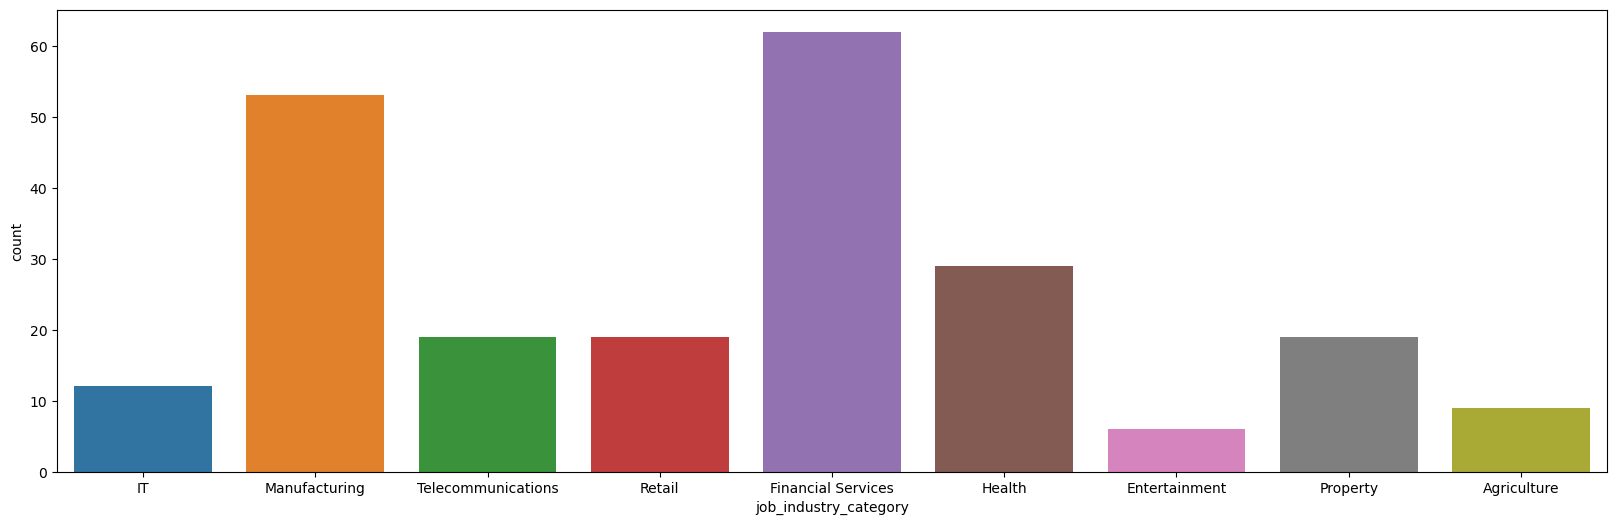

In [51]:
plt.figure(figsize=(20, 6))
sns.countplot(x='job_industry_category', data=filtered_2017_07)